In [ ]:
import cv2 as cv
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sun Sep 15 01:31:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Intro To Tensors

## Creating Tensors

In [ ]:
#there are different kinds of tensors:

#Scalar 0 dimensional
#a scalar is just a number with no dimensions
scalar = torch.tensor(7)
scalar.ndim
scalar.shape
scalar.item() #Get the scalar back as an integer

torch.Size([])

In [ ]:
#Vector 1 dimensional
vector = torch.tensor([7,7])
#dimensions is how many square brackets
vector.ndim
#2 by 1 shape
vector.shape

1

In [ ]:
#MATRIX 2 dimensional
MATRIX = torch.tensor([[7,8],
                      [9,10]])
MATRIX.ndim
MATRIX.shape

2

In [ ]:
#TENSOR x dimensional
TENSOR = torch.tensor([[[1,2,3],
                        [4,5,6],
                        [7,8,9]]])
TENSOR.ndim
TENSOR.shape #The 0th dimension will be 1, since it is 1, 3x3 shape tensor.
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

## Tensor Practice

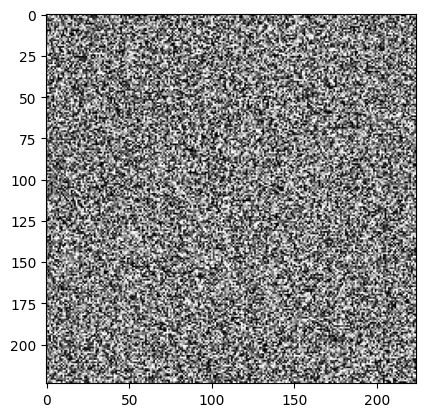

In [ ]:
#Some Practice with Tensors Using pytorch Tensor Documentation
#note torch.tensor() copies the data, avoid copying using as_tensor()

#lets create a tensor so that torch.autograd can perform operations on it
tester = torch.tensor([[1.,-1.],[1., 1.]], requires_grad = True)
ONES = torch.ones([5,5])
ZEROS = torch.zeros([3,3,2]) #tensor with 3 embeded tensors, each with 3 vectors, with 2 values in each vector  3 arrays of 3x2 rowsxcolumns
ZEROS.dim() #returns integer value of the dimensions, here returns 3

ZEROS.add(5) #adds a scalar to the tensors
#lets try generating an array of random numbers and converting it to a tensor

rands = np.random.randint(0, 9, size = (224,224))
tens = torch.as_tensor(rands)
#tens.reshape() #lets reshape the 10x10 array into 4 tensors with 5 rows and 5 columns in each. ie. 100 elements
plt.imshow(tens, 'gray')

## Creating Tensors 2

- Random Tensors are important bc Neural Networks learn with tensors full of random numbers and then adjust the numbers to better represent the data. Random Weight Assignments.
> Start with random nums ---> look at data ---> update random Numbers ---> look at data ---> updata random numbers

In [ ]:
#Random Tensors
rand_tensor = torch.rand(3, 4)
rand_tensor.ndim #two dimensions ie. two surrounding brackets
print(rand_tensor)
# lets create a tensor with dimensions similar to an image
rand_img_tensor = torch.rand(224, 224, 3)
rand_img_tensor.mul_(0)     #from the pytorch tensor documentation I used the mul_ in place function to multiply all the random values by 0 making a black img 224,224 pixels
#Pointless operations but this is just a demonstration
#you can multiply tensors directly aswell
zeros = torch.zeros(3,4)

tensor([[0.1452, 0.5821, 0.6818, 0.7252],
        [0.5475, 0.9325, 0.0656, 0.1480],
        [0.9065, 0.3710, 0.6855, 0.7386]])


In [ ]:
#Creating a range of tensors (start, end, step)
range_ten = torch.arange(1,10)
#creating tensors like, we want to get a tensor with a similar shape of another
zeros = torch.zeros_like(range_ten)
zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor Data Types

- Precision in computing, the mesure of precision is how much detail the number is expressed
- Single precision 32 bit
- Half precision 16 bit

**NOTE** Tensor Datatypes are one of the 3 big common errors in deep learning and pytorch

>- Tensors not right shape
- not right device
- not right data type

In [ ]:

#float 32 is default tensor type, important tensor parameters, dtype, device, requires_grad
float_32_tens = torch.tensor([3.0,6.0,9], dtype = None,  # Default float32, type of tensor, stored in the computer in 32 bits
                                          device = None, # What device the tensor uses (cuda)
                                          requires_grad=False)  # Track the gradients of a tensor in certain numerical calculations
float_32_tens.dtype

float_16_tens = float_32_tens.type(torch.float16)
float_16_tens.dtype

torch.float16

# Week2

## Manipulating Tensors

- addition
- subtraction
- multiplication
- division
- matrix multiplication

In [ ]:
#create a tensor
tensor1 = torch.tensor([1,2,3])
tensor1 + 10 #this isnt reassigning the tensor it is only showing the operation that can be done on the tensor
tensor1 * 10
tensor1 - 10
tensor1 / 10

#try some pytorch built in functions
torch.mul(tensor1, 10)
torch.add(tensor1, 10)
torch.sub(tensor1, 10)
torch.div(tensor1, 10)



tensor([0.1000, 0.2000, 0.3000])

## Matrix multiplication
- there are two main of performing matrix multiplication in neural networks and deep learning
1. element wise multiplication
2. matrix multiplication (dot product)
2x3*3x2 = 2x2 = c =

[SUM(row1*column1)][SUM(row1*column2)]
                    
                    
[SUM(row2*column1)][SUM(row2*column2]

In [ ]:
#regualar multiplication with matrice
print(tensor1, "*", tensor1)
print(f"Equals: {tensor1 * tensor1}")


tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


torch.Size([3])

In [ ]:
#matrix multiplication, pytorch matmul or mm function
tensor2 = torch.matmul(tensor1, tensor1) #this is just multiplying the same matrice

tensor(14)

In [ ]:
#matrix multiplication
#tracks the amount of time it takes to run the current cell
%%time
value  = 0
for i in range(len(tensor1)):
    value += tensor1[i] * tensor1[i]
print(value)

tensor(14)
CPU times: user 4.61 ms, sys: 0 ns, total: 4.61 ms
Wall time: 3.86 ms


### Common Errors in deep learning
 - Shape ERRORS:
 Rules matmul needs to satisfy
 1. Inner dimensions need to match
  - 2x3 @ 3x2
  - not 2x3 @ 2x3
  
2. The resulting matrix has the shape of the outer dimensions.

## Matrix Multiplication pt2


In [ ]:
#shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],   #create a 2 dimension, 3x2 tensor
                        [3,4],
                        [5,6]])
tensor_B = torch.tensor([[7,10],  #create a
                        [8,11],
                        [9,12]])
tensor_A.shape, tensor_B.shape
#These tensors cannot be mm, how can we change the shape to multiply them?
#Transpose method to manipulate the shape of the tensor, switches the axis or dimensions of the tensor ie. 2x3 = 3x2

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
#demonstrating the transpose function
tensor_A.T, tensor_A.T.shape
#we can now perform mm after transposing tensor A from 3x2 to 2x3. this will multiply 2x3 with 3x2
print("The original tensors are", tensor_A.shape, tensor_B.shape)
print("We then Transpose a to a ", tensor_A.T.shape)
torch.mm(tensor_A.T, tensor_B)

The original tensors are torch.Size([3, 2]) torch.Size([3, 2])
We then Transpose a to a  torch.Size([2, 3])


tensor([[ 76, 103],
        [100, 136]])

## Tensor Aggregation, mean, max, min, sum

In [ ]:
tensorA = torch.arange(0,100,10)
print(tensorA)
#find the min and max of the tensors
tensorA.min(), tensorA.max()

#Note the torch.mean function requires a data type of float 32 to work.
tensorA.type(torch.float32).mean(), tensorA.sum(), torch.numel(tensorA) #returns the number of elements in the tensor

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


(tensor(45.), tensor(450), 10)

In [ ]:
#positional min/max, where are the min and max located index.
tensorA.argmin(), tensorA.argmax() #returns the position of the max and min

(tensor(0), tensor(9))

## Reshaping-Viewing-Stacking (Changing Shape)
- **reshaping**: Reshapes an input tensor to a defined shape
- **view**: return a view of an input tensor of a certain shape but keep the same memory as the original. Shows a different perspective
- **stacking**: Shows combine multiple tensors on different dimensions (hstack, vstack or stack)


### Reshaping

In [ ]:
x = torch.arange(1.,10.)
x, x.shape
# Testing Reshape, reshape must be same amount of elements as the original
x_reshape = x.reshape(3,3)
x_reshape, x_reshape.shape


(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

### Viewing

In [ ]:
#Lets try changing the view
z = x.view(1,9)
z.shape
z[:,0] = 5 #change the first element to 5 in z changes it to 5 in x since they are using the same memory, z is just a different view.
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

### Stacking

In [ ]:
#Stacking
x_stacked1 = torch.stack([x,x,x], dim = 0) # 0 stacks vertically, we are stacking 3 'x' tensors here.
x_stacked2 = torch.stack([x,x,x], dim = 1) # 1 stacks horizontally, we are stacking 3 'x' tensors here.
#x_stacked = torch.stack([x,x,x], dim = 2) # 2 stacks along the third dimension, we are stacking 3 'x' tensors here. Out of dimension Range
x_stacked1, x_stacked1.shape
x_stacked2, x_stacked2.shape

(tensor([[5., 5., 5.],
         [2., 2., 2.],
         [3., 3., 3.],
         [4., 4., 4.],
         [5., 5., 5.],
         [6., 6., 6.],
         [7., 7., 7.],
         [8., 8., 8.],
         [9., 9., 9.]]),
 torch.Size([9, 3]))

## Squeezing and Unsqueezing (Changing Dimensions)
- **squeeze**: removes all `1` dimensions from a tensor
- **unsqueeze**: add a `1` dimension to a target tensor
-  **permute**: return a view of the input with dimensions swapped in a certain way.

### Squeezing

In [ ]:
#Squeezing
x_reshape.shape #there are no single dimensions

torch.Size([3, 3])

In [ ]:
x_reshape.squeeze() #there is no change

z.shape #z is a 1, 9 tensor we can remove one demension by squeezing it removing the outer bracket.
z.squeeze().shape #this function is useful when we have a dimension mismatch when performing operations

print(f"Previous tensor: {z}")
print(f"Previous shape: {z.shape}")
print(f"New tensor: {z.squeeze()}")
print(f"New shape: {z.squeeze().shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])
New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


### Unsqueezing

In [ ]:
#Unsqueezing -  adds a single dimension to a target tensor at a specific dim
print(f"Previous tensor: {z}")
print(f"Previous shape: {z.shape}")
print(f"New tensor: {z.unsqueeze(dim = 1)}") #puts the new dimension in the 1st index
print(f"New shape: {z.unsqueeze(dim = 1).shape}")


Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])
New tensor: tensor([[[5., 2., 3., 4., 5., 6., 7., 8., 9.]]])
New shape: torch.Size([1, 1, 9])


### Permuting

In [ ]:
#Permute -  rearranges the dimensions of a target tensor in a specified order. returns a view of the original tensor with order of the dimensions swapped.
#gives a specified permuatation of the dimensions

image_like = torch.rand(size = (224,224,3)) #lets permute an image like tensor H,W,Color Channels
#we want to switch color channels to the first dimension
image_like_permuted = image_like.permute(2,0,1) #shifts the axis 0->1, 1->2, 2->0

print(f"Previous shape: {image_like.shape}")
print(f"New shape: {image_like_permuted.shape}") #Color Channels, H, W
#this is similar to what open CV does with converting BGR2RGB

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## Indexing Tensors

- Similar to indexing with numpy, Indexing practice.
- **Note** the number of brackets in each method.


In [ ]:
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
#index the tensor
x[0] #first Dimension

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[0,0] #first dimension, first row
#or
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0][0][0]

tensor(1)

In [ ]:
#Slicing indexes
x[0,0:2,:] #In the first dimension, take the fist two rows, and all columns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x[:,0:2,0] #In the first dimension, take the first two rows, but only the first column

tensor([[1, 4]])

In [ ]:
x[0,0,:] #Keep in mind the number of brackets. we are taking the

x[0,:,2] #In the first dimension, take all the rows, but only the last column

tensor([3, 6, 9])

In [ ]:
x[0,-1,-1] #last element in the last row

tensor(9)

# Week 3

### Numpy with Pytorch
- torch tensor to numpy: torch.Tensor.numpy()
- Numpy array to tensor: torch.from_numpy(ndarray)

- When converting np array to tensor, the data type carries over to the tensor.


In [ ]:
array  = np.arange(1.0, 8.0, dtype = np.float32)
tensor  =  torch.from_numpy(array)
#numpy default data type is float 64
#pytorch default data tpye is float 32
#can also use .type method to change the dtype of a tensor

tensor.dtype, array.dtype

(torch.float32, dtype('float32'))

In [ ]:
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.], dtype=float32),
 tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
#tensor to numpy array

tensor = torch.ones(10)
num_array = tensor.numpy()
tensor.dtype, num_array.dtype
#the tensor data type reflects the default data type of pytorch

(torch.float32, dtype('float32'))

### Reproducibility

- Taking the random out of random

- Neural Networks uses random numbers and updates the random numbers to represent the data better. Repeated.

- When we create a random tensor we get different numbers each run.

- we set a seed to reduce the randomness in neural networks

In [ ]:
#two random tensors

rand_1 = torch.rand(3,5)
rand_2 = torch.rand(3,5)
print(rand_1,rand_2)
#we can get a tensor of true/false values checking each value for ==
print(rand_1 == rand_2)


tensor([[0.3368, 0.1015, 0.2695, 0.2687, 0.1538],
        [0.8358, 0.8318, 0.8063, 0.2246, 0.9059],
        [0.8519, 0.4274, 0.4263, 0.9472, 0.1630]]) tensor([[0.1359, 0.6091, 0.4079, 0.4986, 0.4793],
        [0.4288, 0.4259, 0.6555, 0.1457, 0.0757],
        [0.7777, 0.9266, 0.2679, 0.0587, 0.4601]])
tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])


In [ ]:
import torch
# making the values reproducible
#set the random seed
torch.manual_seed(42)
rand_1 = torch.rand(3,5)
torch.manual_seed(42)
#we have to set the random seed everytime we create a rand tensor
rand_2 = torch.rand(3,5)
print(rand_1,rand_2)
print(rand_1 == rand_2)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
        [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
        [0.9346, 0.5936, 0.8694, 0.5677, 0.7411]]) tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
        [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
        [0.9346, 0.5936, 0.8694, 0.5677, 0.7411]])
tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])


Extra resources for reproducibility
https://pytorch.org/docs/stable/notes/randomness.html

### Using GPU
- Use cloud Computing: AWS, Azure, GCP.
- Change Runtime Type to GPU when using colab GPU
- use !nvidia -smi to check current GPU
- cuda is Nvidia API that allows use of their GPUs



#### Setup Device agnostic Code
- we set the device variable, use cuda if available else use CPU
- best practice to use the device variable. and setup device agnostic code.



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Sending Operations to Devices

- We want the tensors/models on the GPU since it results in faster computations


In [ ]:
#create a tensor, default is on the CPU
tensor =  torch.tensor([1,2,3,4,5])
print(tensor, tensor.device)
#our target device is GPU

tensor([1, 2, 3, 4, 5]) cpu


In [ ]:
#using agnostic code to use GPU, device is set to cude if available, to method moves tensors/models to target device
#numpy only works with CPU
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

#Moving Back to the CPU if tensor is on GPU to work with NUMPY
#tensor.cpu brings tensor back to CPU
tensor_on_cpu = tensor_on_gpu.cpu()
#convert tensor to numpy array
tensor_on_cpu.numpy()


array([1, 2, 3, 4, 5])

### Practice Section Fundamentals

In [ ]:
#Testing What I have Learning From above.
#create a random tensor
rand_tensor = torch.rand(7,7)
rand_tensor

#perform tensor multiplication on tensor shape (7,7) and (1,7)
#remember the inner dimension numbers must match

rand_tensor2 = torch.rand(1,7)
rand_tensor2.shape, rand_tensor.shape

#since the inner dimensions are the same we dont have to transpose
#perform MM
rand_tensor2 @ rand_tensor
#or
new_tensor = torch.matmul(rand_tensor2, rand_tensor)
new_tensor

#set the random seed to zero and perform the MM again
torch.manual_seed(0)
tensorA = torch.rand(7,7)
torch.manual_seed(0) #set the manual seed again since we are in colab
tensorB = torch.rand(1,7)
tensorB = tensorB.T
# here we need to transpose since we are mm a 7,7 with 1,7 and 1!=7
new_tensor = torch.mm(tensorA, tensorB)
new_tensor

#The above manual seed sets the seed for the CPU and GPU
#set to 1234
torch.manual_seed(1234)
#lets setup agnostic code to run this on our GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor_gpu = torch.rand(7,7).to(device)
tensor_gpu2 = torch.rand(1,7).to(device)
#multiply the gpu tensors
new_tensor = torch.matmul(tensor_gpu, tensor_gpu2.T)
new_tensor




tensor([[1.5166],
        [3.1874],
        [2.5350],
        [2.8343],
        [2.6844],
        [2.6483],
        [2.4059]], device='cuda:0')

# Pytorch WorkFlow

- Pre-Process data, Convert Data to Tensors
- Pick a Pre-trained model, loss function and Optimizer
- build training loop
- Fit the model to our data
- evaluate the model, Get the statistics
- improve model
- save and reload

Learning Process: Code, Try, Read, Search.

  **End-to-End Workflow**

In [9]:
what_were_doing = {1:"data(prepare and load)",
                   2:"build model",
                   3:"fitting the model (train)",
                   4:"Making predictons (inference)",
                   5:"Saving and loading models",
                   6:"Putting it all together"}


In [1]:
import torch
import torch.nn as nn #contains all of the neural net building blocks, provides layers
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
torch.__version__ #cuda 121 version 2.4.1

'2.5.0+cu121'

## Preparing and loading Data
1. Convert data into numerical representations
2. build a model to learn patterns in the data

Lets use the linear regression formula Y=aX+b to create some *known* data
,Using this to make a line of known parameters.
,learn the representation.


In [3]:
#known parameters
weight = .7   #a
bias = .3     #b

#create a range of numbers
start = 0
end = 1
step = .02

#we are adding an extra dimension for later.
X = torch.arange(start,end,step).unsqueeze(dim=1) #capital since a it will represent a matrix/tensor, lowercase is a vector
y = weight * X + bias #y=aX+b
X[:10], y[:10]
len(X), len(y)

(50, 50)

## Datasets

Training Dataset:   (Teach the model) The data the model learns from. 60-80%

Testing Dataset:    (Test the models Generalization) The model gets evaluated on this data. 10-20%

Validation Dataset: (Tune the model patterns) The model gets updated on this
data. 10-20% (not required)









In [4]:
#we have 50 x points and 50 y points

#create train/test split (80/20), Simple dataset thus this is a simple process
train_split = int(0.8 * len(X)) #80% of 50
X_train, y_train  = X[:train_split], y[:train_split] #Training sets
X_test, y_test = X[train_split:], y[train_split:]    #Testing sets
len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [16]:
#create a function to viusalize predictions
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None): #set to none here since we havent made any predictions yet
#lets plot the numbers using matplotlib
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,s=4, label = "Training Data")
  plt.scatter(test_data, test_labels,s=4, label = "Testing Data")
  plt.xlabel("X Data")
  plt.ylabel("y Labels")
  plt.legend()

  #when we have predictions.
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, label = "Predictions")
    plt.legend()
  plt.show()


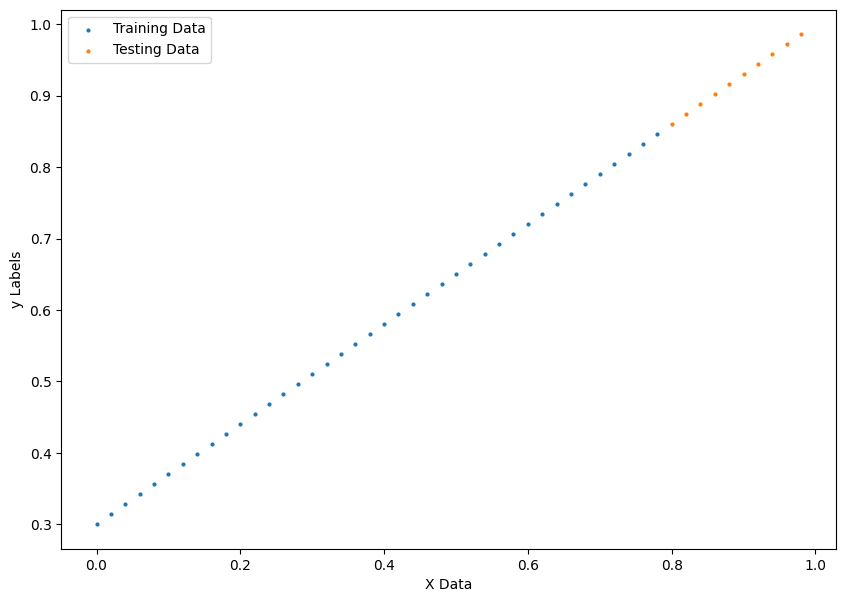

In [17]:
plot_predictions()

## Building a Pytorch model.


#### What the Model is doing
- starts with random values (weight/bias)
- look at training data nd adjust the random values to close the the representation of the data


Algorithms
---
https://www.youtube.com/watch?v=IHZwWFHWa-w

Gradient Descent: Optimization approach, uses the loss (number that determines how well the model predicts) to update the models weights. The loss function sometimes refered to as the cost function measures the distance between the actual and the predicted values at a given point. A loss function uses learning rate (step size/alpha) calculate to the convergence point (minimum slope). Conclusion, algorithm to find the weights and biases that minimize a specified loss function.

Issues:
Gradient descent may struggle with saddle points for local minimums, since the slope will be smallest in two or more general locations. Vanishing Gradients, when backpropogation happens and the gradient is too small the weight parameters can become insignificantly small, thus no longer training. Exploding gradients is when the gradient is too large.



https://www.youtube.com/watch?v=Ilg3gGewQ5U

Back Propogation: Algorithm for computing the gradient, How does a single training example would like to nudge the weights and biases. Stochastic Gradient speeds up the learning rate by using mini batches to converge to a local minimum of the cost function.=

Code Explaination: When we build a model in pytorch we must inherit the nn.module class to get the building blocks for neural networks. We then initialize the model parameters or initialize layers for larger models. Requires Grad means pytorch will track all of the gradients of the parameter used for autoGrad and gradient descent. The forward class is then defined to override the nn.module forward class. This defines the forward computation of the model.

In [7]:
#Linear regression model class
class LinearRegressionModel(nn.Module): #inherits from nn.Module, Building block for pytorch model. Provides functions.
  def __init__(self): #constructor
    super().__init__() #call the parent class constructor nn.Module

    #start with random numbers and update these values to better match the pattern, Tracks gradients for gradient descent.
    #for images we don't define these parameters and we use pytorch to do so (torchvision).
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32)) #random parameters

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    #define a forward method for the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #passing in input data and returning prediction y.
    return self.weights * x + self.bias #linear regression formula



#### Pytorch Model Building Essentials

- torch.nn, contains the building blocks for computational graphs, (a neural network can be a computational graph)

- torch.nn.Parameters, what parameters should our model try and learn, this will be set by a pytorch layer from torch.nn

- torch.nn.Module, base class for all neural network modules, when inherited you need to override forward

- torch.optim, optimizers for pytorch that help with gradient descent, algorithms that optimize the parameters that better represent the data

- def forward(), all nn.Module subclasses must overide this method and define the forwad computation.

- torch.utils.data.Dataset, Represents a map between key (label) and sample (features) pairs of your data such as images and labels.

- torch.utils.data.Dataloaders, creates an iterable over a dataset, allows you to iterate over the dataset.

- torchvision.transforms, used for computer vision

- torchvision.models, contains pre-trained models for computer vision problems

- torchmetrics, used to evaluate the model

- torch.utils.tensorboard, improve through experimentation




https://pytorch.org/tutorials/beginner/ptcheat.html




In [10]:
for key in what_were_doing:
  print(key, what_were_doing[key])

1 data(prepare and load)
2 build model
3 fitting the model (train)
4 Making predictons (inference)
5 Saving and loading models
6 Putting it all together


In [11]:
### checking whats inside our model, using .parameters

#create a random seed so the numbers remain the same.
torch.manual_seed(42)

model_0 = LinearRegressionModel()

#model_0.parameters returns a generator, thus we can list them
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict() #returns a dictionary of the model parameters
#The goal is to get these random values as close as possible to the ideal values, in most cases we dont know the ideal values
#The ideal values are what closely represent our data.

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
## Making predictions using torch.inference_mode()
#when we pass data through our model its oing to un it through the forward method.

X_test, y_test #with a perfect model it will take the X-test values and perfectly predict this y

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [18]:
#making predictions, the not implemented error is due to indentation
#inference mode is used when we dont want the gradient tracking since we are just visualizing our data,
#this means pytorch is tracking less data, making the predictions much faster.
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

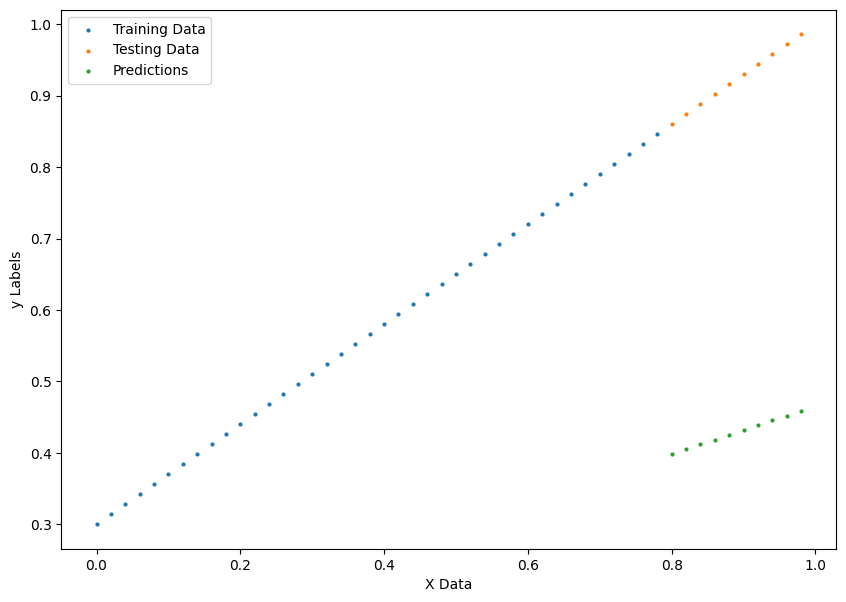

In [19]:
plot_predictions(predictions = y_preds)
#based on these predictions we want to update these values to better match the predictons

#### Training Code for the Linear Regression Model

In [20]:
#loss function measures how far off our models predictions are to ideal outputs, we want a lower value for the loss function.
#pytorch has loss functions built in

#what do we need to train?
#loss function, determines how far off we are from good data representation
#optimizer, takes into account the loss and adjusts the parameters, to improve the loss function (lower it's results)

#For pytorch we need:
#Training loop
#Testing loop

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#We can look at loss functions in the pytorch documentation
#L1Loss is the mean absolute error loss function and MSELoss is mean square error loss (used for regression probs)
#cross entropy loss is used for classification problems


#setup the loss function
loss_fn = nn.L1loss()


#setup the optimizer, starting with stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters, lr = .01) #select the the parameters and the learning rate,
# Higher learning rate the shorter training time, lower longer training time, larger/smaller changes to the parameters
# We need to find a balanced learning rate.


#Training loop

#Testing loop


### OCT IMAGE CLASSIFICATION


- based on research EfficientNetB0-7, ViT', amd ConvNeXt are the most modern model with good results in image classification.

- Other models such as MSA-NET are also used widely in medical image classification and segmentation.

Difficulties with OCT image classification:
- Small number of reliable datasets
- Datasets are small in size
- Segmentation is very difficult for these medical images.
- Unreliable Pre-processsing methods.
- Inconsistency in the images including amount of noise makes it difficult to train. Variations in regions of interest.
- When transfer learning we are using the parameters of another model.

Potential Solutions:
- Augmenting the datasets, artificially enlarging them.
- Transfer Learning.
- Attempt pre-processing methods to assimilate the images.





#### What to work on:

- Work on building a CNN, Focus on how to build it rather than how it works
- Read research papers and look at the code to see what they have written dont worry about the reasoning behind the methods right now, if it works it works.
- study the datasets and analyze the images and mess around with the data.
